<a href="https://colab.research.google.com/github/vkate1/Summer-Training-for-III-year/blob/main/Day7/CNN/sign_language_mnist_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

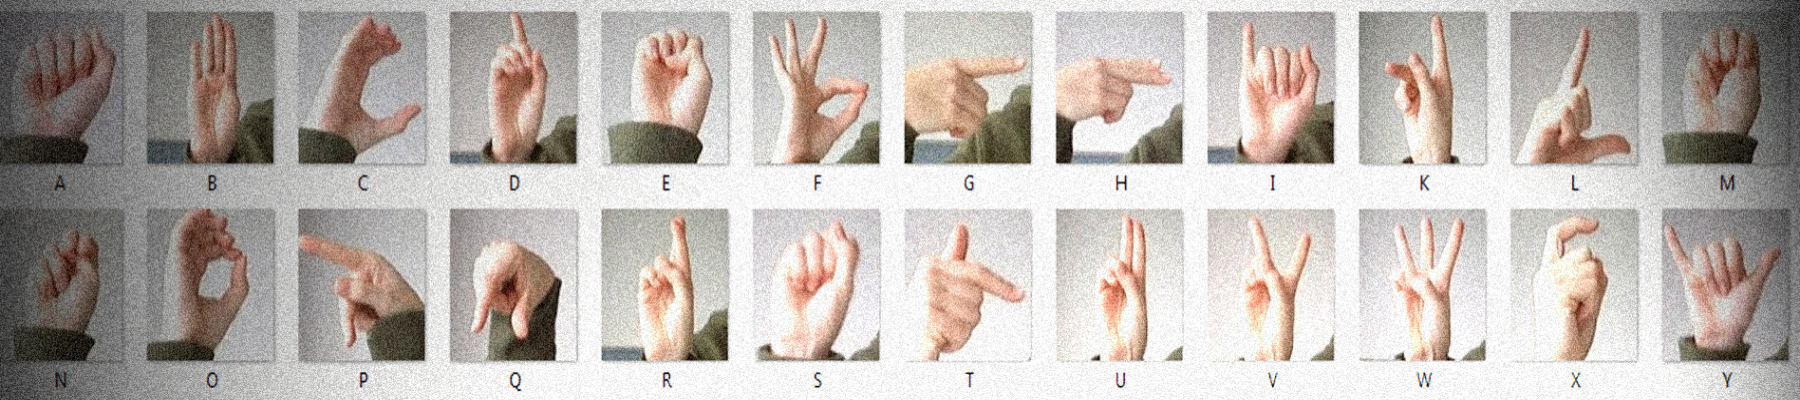

In [ ]:
# Get our Training and Test Data
train = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
train.shape

In [ ]:
# Get our Training and Test Data
test = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')
test.shape

In [ ]:
# Inspect our training data
train.head()

In [ ]:
test.head()

In [ ]:
# Get our Training labels
labels=train['label'].values

In [ ]:

unique_val=np.array(labels)
np.unique(unique_val)

In [ ]:
#or alternative below code could also be written
#NUM_CLASSES = len(train_df['label'].unique())
#print(NUM_CLASSES)


In [ ]:
# plot the quantities in each class
plt.figure(figsize=(18,8))
sns.countplot(x=labels)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer= LabelBinarizer()
labels = label_binarizer.fit_transform(train['label'].values)

In [ ]:
train.drop('label', axis = 1, inplace = True)

images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3, random_state = 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_validation = x_validation.astype('float32')
                             
x_train /= 255
x_test /= 255
x_validation /= 255
                             
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

print('x shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_validation.shape[0], 'validation samples')

In [ ]:
num_classes = 24
batch_size = 192
epochs = 5

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adadelta',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_validation, y_validation))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_validation, y_validation, verbose=1)
print('val. loss:', score[0])
print('val. accuracy:', score[1])